In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense,Flatten

In [2]:
x_train = np.loadtxt('input.csv', delimiter=',')
y_train = np.loadtxt('labels.csv', delimiter=',')

x_test = np.loadtxt('input_test.csv', delimiter=',')
y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [3]:
x_train = x_train.reshape(len(x_train),100, 100, 3)
y_train = y_train.reshape(len(y_train),1)

x_test = x_test.reshape(len(x_test),100, 100, 3)
y_test = y_test.reshape(len(y_test),1)

x_train =x_train/255.0
x_test =x_test/255.0

In [4]:
print("shape of x_train",x_train.shape)
print("shape of y_train",y_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_test",y_test.shape)


shape of x_train (2000, 100, 100, 3)
shape of y_train (2000, 1)
shape of x_test (400, 100, 100, 3)
shape of y_test (400, 1)


In [4]:
x_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

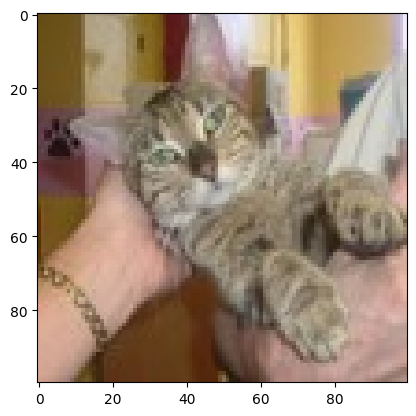

In [6]:
idx =random.randint(0,len(x_train))
plt.imshow(x_train[idx, :])
plt.show()


In [5]:
model =Sequential()
model.add(Conv2D(32,(3,3), activation ='relu' , input_shape =(100, 100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3), activation ='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))

In [6]:
model.compile(loss ='binary_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs= 5, batch_size =64)

Epoch 1/5
32/32 [==============================] - 12s 319ms/step - loss: 0.7192 - accuracy: 0.5220
Epoch 2/5
32/32 [==============================] - 10s 308ms/step - loss: 0.6671 - accuracy: 0.5820
Epoch 3/5
32/32 [==============================] - 10s 317ms/step - loss: 0.6079 - accuracy: 0.6740
Epoch 4/5
32/32 [==============================] - 10s 326ms/step - loss: 0.5463 - accuracy: 0.7200
Epoch 5/5
32/32 [==============================] - 10s 323ms/step - loss: 0.4850 - accuracy: 0.7650


In [8]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 1s 37ms/step - loss: 0.5986 - accuracy: 0.6525


[0.5985878109931946, 0.6524999737739563]

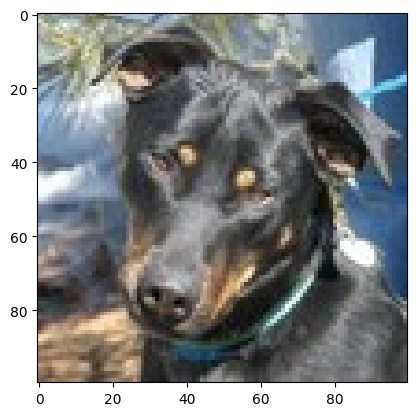

1/1 [==============================] - 0s 31ms/step
Our model says it is a : Dog


In [14]:
idx2 =random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2, :].reshape(1, 100, 100,3))
y_pred = y_pred > 0.5
if(y_pred ==0):
    pred = 'Dog'
else:
    pred = 'cat'
print("Our model says it is a :",pred)   